**EXPLORING HR RECRUITMENT DATA: PREDICTING CANDIDATE JOINING**

The dataset `hr_data.csv` contains samples of candidates that were part of a recruitment process of a particular client of ScaleneWorks. ScaleneWorks supports several information technology (IT) companies in Inda with their talent acquisition. One of the challenge they face is about 30% of the candidates who accept the jobs offer, do not join the company. This leads to huge loss of revenue and time as companies initiate the recruitment process again to fill the workforce demand. ScaleneWorks wants to find out if a model can be built to predict the likelihood of a candidate joining the company. If the likelihood is high, then the company can go ahead and offer jobs to the candidates.

The dataset contains several attributes about candidates along with a column (or variable) that indicates if the candidate finally joined the company or not.

Here is the description of candidate's attributes:

* *Candidate* - Reference number; it is a unique number to identify the candidate
* *DOJ extended* - Binary variable identifying whether candidate asked for date of joining enxtension (Yes/No)
* *Duration to accept the offer* - Number of days taken by the candidate to accept the offer (Scale variable)
* *Notice period* - Notice period to be served in the parting company before candidate can join this company (Scale variable)
* *Offered band* - Band offered to the candidate based on experience, performance in interview rounds (C0/C1/C2/C3/C4/C5/C6)
* *Percentage hike expected* - Percentage hike expected by the candidate (Scale variable)
* *Percentage hike offered* - Percentage hike offered by the company (Scale variable)
* *Joining Bonus* - Binary variable indicating if joining bonus was given or not (Yes/No)
* *Gender* - Gender of the candidate (Male/Female)
* *Candidate source* - Source from which resume of the candidate was obtained (Employee referral/Agency/Direct)
* *REX (in Yrs.)* - Relevant years of experience of the candidate for the position offered (Scale variable)
* *LOB* - Line of business for which offer was rolled out (Categorical variable)
* *Date of Birth* - Date of birth of the candidate
* *Joining location* - Company location for which the offer was rolled out for the candidate to join (Categorical variable)
* *Candidate relocation status* - Binary variable indicating whether the candidate has to relocate from one city to another city for joining (Yes/No)
* *HR Status* - Final joining status of the candidate (Joined/Not Joined)

**Q1. Build a logistic regression model to predict the probability of a candidate joining the company. Assume "Not Joined" as positive cases and "Joined" as negative cases.**

**Ans:-**

In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from scipy import stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

**Reading and Displaying few records of the data**

In [192]:
HR_data_df = pd.read_csv('hr_data.csv')
HR_data_df.head(10)

,SLNO,Candidate Ref,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age,Status
0,1,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,2,2112635,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,3,2112838,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,4,2115021,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,5,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined
5,6,2117167,Yes,17,30,E1,42.83,42.83,0.00,No,No,Male,Employee Referral,2,INFRA,Noida,34,Joined
6,7,2119124,Yes,37,30,E2,31.58,31.58,0.00,No,No,Male,Employee Referral,7,INFRA,Noida,32,Joined
7,9,2127572,Yes,16,0,E1,-20.00,-20.00,0.00,No,No,Female,Direct,8,Healthcare,Noida,34,Joined
8,11,2138169,No,1,30,E1,-22.22,-22.22,0.00,No,No,Female,Employee Referral,3,BFSI,Gurgaon,26,Joined
9,12,2143362,No,6,30,E1,240.00,220.00,-5.88,No,No,Male,Employee Referral,3,CSMP,Chennai,34,Joined


In [193]:
HR_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8995 entries, 0 to 8994
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SLNO                         8995 non-null   int64  
 1   Candidate Ref                8995 non-null   int64  
 2   DOJ Extended                 8995 non-null   object 
 3   Duration to accept offer     8995 non-null   int64  
 4   Notice period                8995 non-null   int64  
 5   Offered band                 8995 non-null   object 
 6   Pecent hike expected in CTC  8995 non-null   float64
 7   Percent hike offered in CTC  8995 non-null   float64
 8   Percent difference CTC       8995 non-null   float64
 9   Joining Bonus                8995 non-null   object 
 10  Candidate relocate actual    8995 non-null   object 
 11  Gender                       8995 non-null   object 
 12  Candidate Source             8995 non-null   object 
 13  Rex in Yrs        

In [194]:
HR_data_df['Status'].value_counts()

Status
Joined        7313
Not Joined    1682
Name: count, dtype: int64

So from above we can see that there are 7313 candidates who Joined (Status = 0) and 1682 candidates who did not Join (Status = 1).

In [195]:
X_features = list(HR_data_df.columns)
X_features.remove('Status')
X_features

['SLNO',
 'Candidate Ref',
 'DOJ Extended',
 'Duration to accept offer',
 'Notice period',
 'Offered band',
 'Pecent hike expected in CTC',
 'Percent hike offered in CTC',
 'Percent difference CTC',
 'Joining Bonus',
 'Candidate relocate actual',
 'Gender',
 'Candidate Source',
 'Rex in Yrs',
 'LOB',
 'Location',
 'Age']

Here, `SLNO` and `Candidate Ref` are not going to be of any use for predicting. So we drop them.

In [196]:
X_features.remove('SLNO')
X_features.remove('Candidate Ref')
X_features

['DOJ Extended',
 'Duration to accept offer',
 'Notice period',
 'Offered band',
 'Pecent hike expected in CTC',
 'Percent hike offered in CTC',
 'Percent difference CTC',
 'Joining Bonus',
 'Candidate relocate actual',
 'Gender',
 'Candidate Source',
 'Rex in Yrs',
 'LOB',
 'Location',
 'Age']

**Encoding Categorical Features**

In [197]:
encoded_HR_df = pd.get_dummies(HR_data_df[X_features], drop_first=True, dtype='int64')
encoded_HR_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8995 entries, 0 to 8994
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Duration to accept offer            8995 non-null   int64  
 1   Notice period                       8995 non-null   int64  
 2   Pecent hike expected in CTC         8995 non-null   float64
 3   Percent hike offered in CTC         8995 non-null   float64
 4   Percent difference CTC              8995 non-null   float64
 5   Rex in Yrs                          8995 non-null   int64  
 6   Age                                 8995 non-null   int64  
 7   DOJ Extended_Yes                    8995 non-null   int64  
 8   Offered band_E1                     8995 non-null   int64  
 9   Offered band_E2                     8995 non-null   int64  
 10  Offered band_E3                     8995 non-null   int64  
 11  Joining Bonus_Yes                   8995 no

In [198]:
Y = HR_data_df['Status'].map({'Joined': 0, 'Not Joined': 1})
X = sm.add_constant(encoded_HR_df)

**Splitting Dataset into Training and Validation Sets**

In [199]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif_factors(X):
    X_matrix = X.values
    vif = [variance_inflation_factor(X_matrix, i) for i in range(X_matrix.shape[1])]
    
    vif_factors = pd.DataFrame()
    vif_factors['column'] = X.columns
    vif_factors['VIF'] = vif
    
    return vif_factors


vif_factors = get_vif_factors(X[encoded_HR_df.columns])
vif_factors


,column,VIF
0,Duration to accept offer,2.252260
1,Notice period,5.113223
2,Pecent hike expected in CTC,52.897129
3,Percent hike offered in CTC,57.019709
4,Percent difference CTC,14.333705
5,Rex in Yrs,11.568641
6,Age,82.288149
7,DOJ Extended_Yes,2.294047
8,Offered band_E1,31.652216
9,Offered band_E2,18.235493


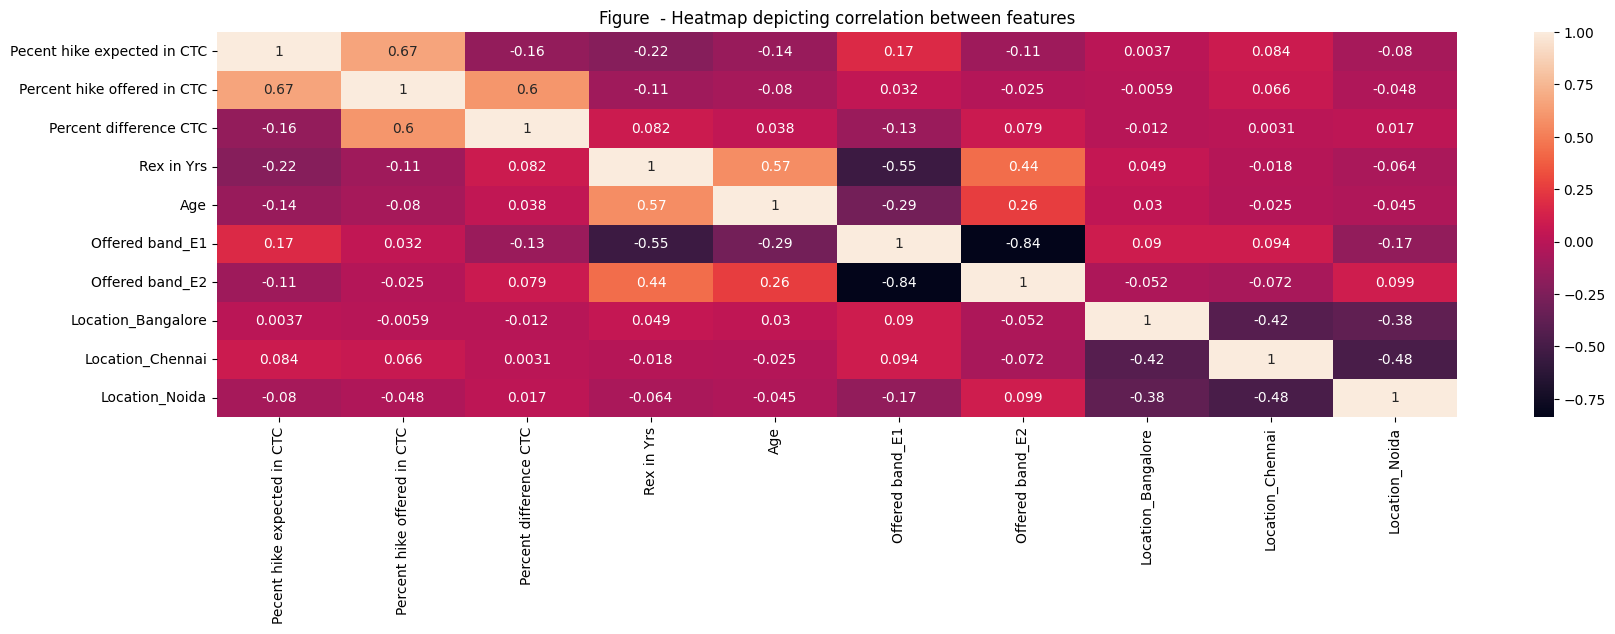

In [204]:
columns_with_large_vif = vif_factors[vif_factors.VIF > 10].column
plt.figure(figsize=(20,5))
sn.heatmap(X[columns_with_large_vif].corr(), annot=True)
plt.title("Figure  - Heatmap depicting correlation between features")
plt.show()

**Building Logistic Regression Model**

In [190]:
logit = sm.Logit(y_train, X_train)
logit_lm = logit.fit(maxiter=100)

         Current function value: 0.418343
         Iterations: 100


C:\Users\rahak\.virtualenvs\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
